In [1]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
def figure_process(file_name):
    
    #Selects a file and takes the time points of 0-120 seconds
    data = pd.read_csv(file_name)
    file= data.head(241)
    
    #Creates rolling ball averages of mV column
    file['av_mV']= file.loc[:, 'mV'].rolling(5, min_periods = 1).mean().fillna(0)
    
    #Creates the derivative of column mV
    deriv = []
    for i, _ in enumerate(file.index):
        if i + 1 < len(file):
            deriv.append(file.loc[i +1, 'av_mV'] - file.loc[i, 'av_mV'])

        else:
            deriv.append(deriv[-1])
            break
    file['d_av_mV'] = deriv

    #Creates Time-max column
    file['Time-max'] = file.loc[:, 'Time(sec)'] - (data.loc[data.index[-1], 'Time(sec)'] - 120)
    return file

In [3]:
def figure_draw(file_name, axis):
    
    file = figure_process(file_name)
    
    #Draws a line plot using the data from the part above, 
    #allowing the user to choose what parameters are we comparing against time
    file = file.set_index('Time(sec)')
    if axis == 'mv'.upper():
        plt.plot(file.loc[:,'mV']);
        plt.ylabel('mV', size = 13)
    elif axis == 'amps'.upper():
        plt.plot(file.loc[:, 'Amps']);
        plt.ylabel('Amps', size = 13)
    elif axis == 'av_mV'.upper():
        plt.plot(file.loc[:, 'av_mV']);
        plt.ylabel('Suvidurkintas mV', size = 13)
    elif axis == 'd_av_mv'.upper():
        plt.plot(file.loc[:, 'd_av_mV'])
        plt.ylabel('Vidutinio mV išvestinė', size = 13)

    #plt.title(file_name, size = 15)
    plt.xlabel('Time, sec', size = 13)
    return file

In [4]:
def draw_all():
    
    #Collects the information about the data- where are they stored, what parameters are we comparing and what are the file names
    cur_dir = input('Where are Your .csv files stored on Your computer?')
    os.chdir(cur_dir)
    axis = input('Comparing time and what parameter? Capitalization does not matter here').upper()
    file_list = glob.glob('*.csv')
    
    #Creates paths to output folders
    csv_folder_name = f'{axis} csv'
    fig_folder_name = f'{axis} graphs'
    csv_folder = os.path.join(cur_dir, csv_folder_name)
    fig_folder = os.path.join(cur_dir, fig_folder_name)
    
    #Creates output folders
    os.mkdir(csv_folder)
    os.mkdir(fig_folder)
    
    #Draws graphs from every csv file
    for i in range(len(glob.glob('*.csv'))):
        os.chdir(f'{cur_dir}')
        filename = file_list[i]
        plt.figure()
        table = figure_draw(filename, axis)
        plt.title(filename, size = 15)
        os.chdir(f'{csv_folder}')
        table.to_csv(f'{axis}_{filename}')

        os.chdir('..')
        os.chdir(f'{fig_folder}')
        plt.savefig(f'{axis}_{filename[:-9]}.png')
        
    return print(f'Your csv files have been successfully saved in {csv_folder} and Your figures have been saved in {fig_folder}')


Where are Your .csv files stored on Your computer? C:\Users\justa\OneDrive\Stalinis kompiuteris\Personal\Programming\Mariui\Data
Comparing time and what parameter? Capitalization does not matter here av_mv


C:\Users\justa\AppData\Local\Temp\ipykernel_1580\49853344.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['av_mV']= file.loc[:, 'mV'].rolling(5, min_periods = 1).mean().fillna(0)
C:\Users\justa\AppData\Local\Temp\ipykernel_1580\49853344.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file['d_av_mV'] = deriv
C:\Users\justa\AppData\Local\Temp\ipykernel_1580\49853344.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Your csv files have been successfully saved in C:\Users\justa\OneDrive\Stalinis kompiuteris\Personal\Programming\Mariui\Data\AV_MV csv and Your figures have been saved in C:\Users\justa\OneDrive\Stalinis kompiuteris\Personal\Programming\Mariui\Data\AV_MV graphs


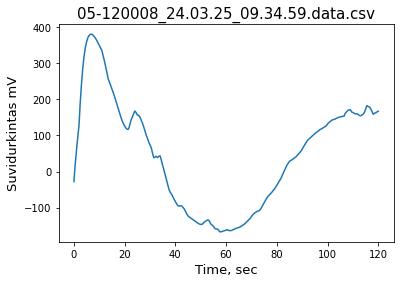

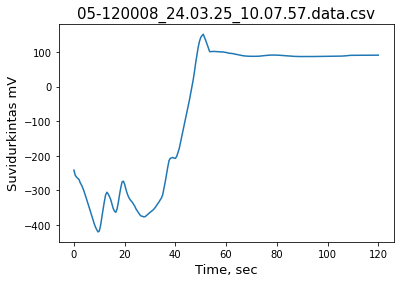

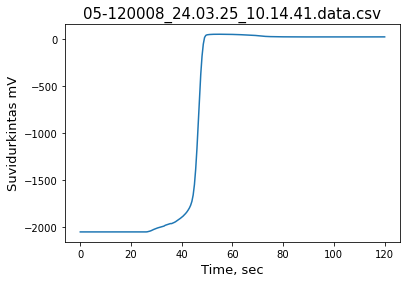

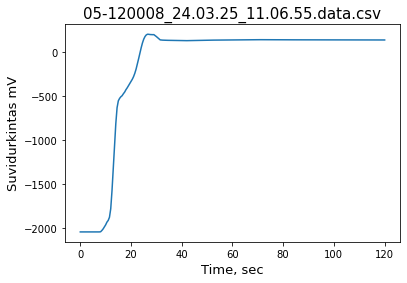

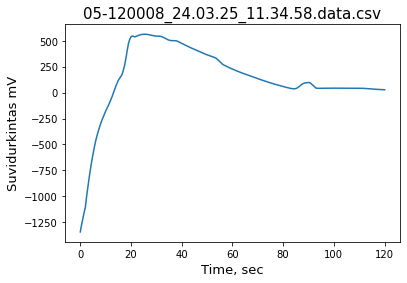

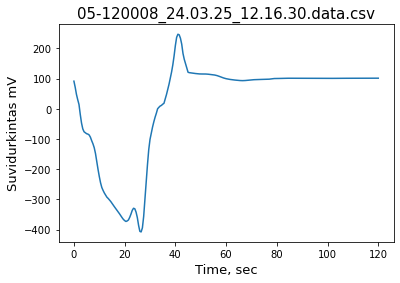

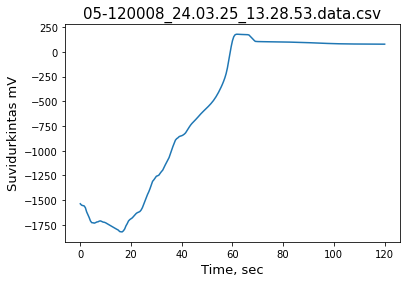

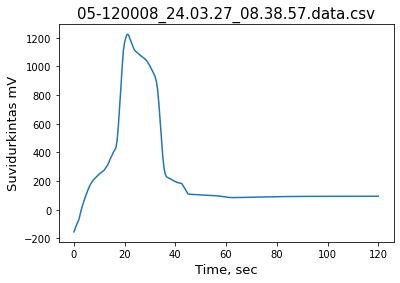

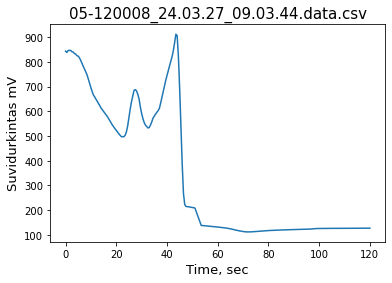

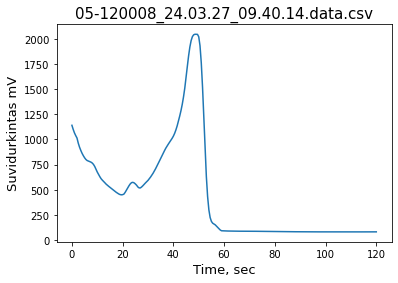

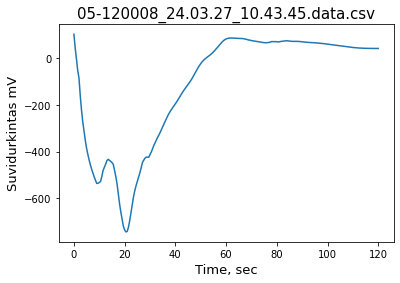

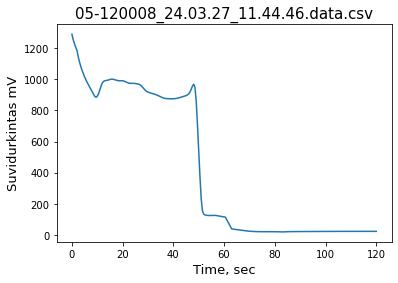

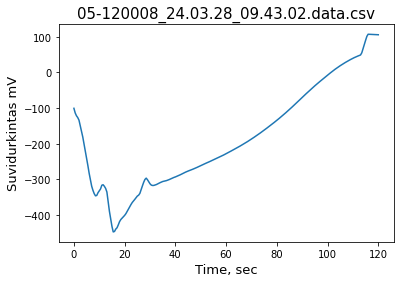

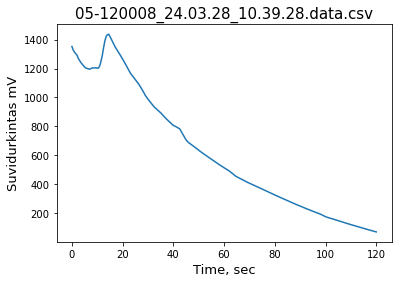

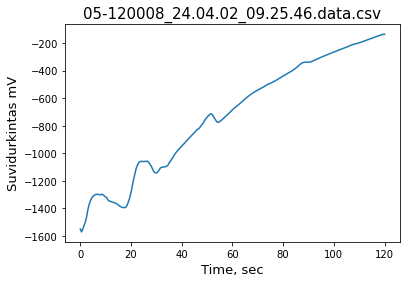

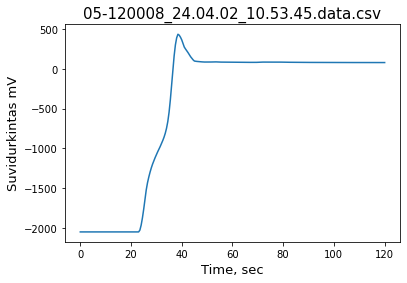

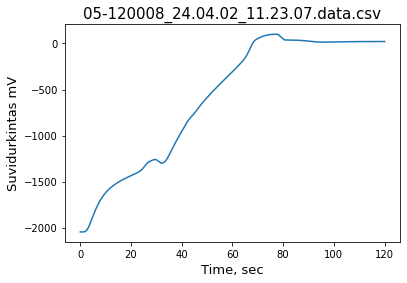

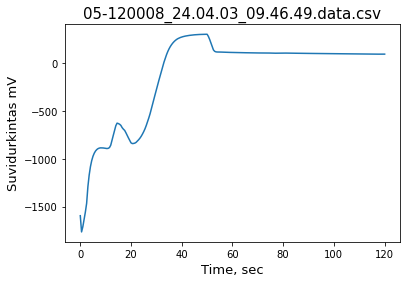

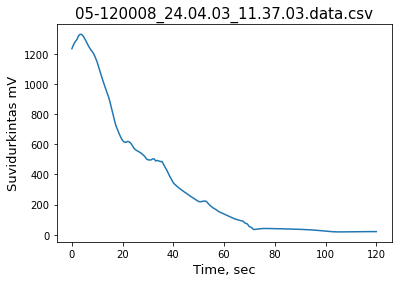

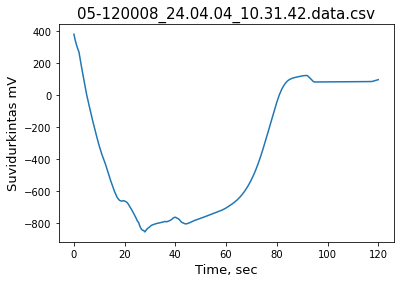

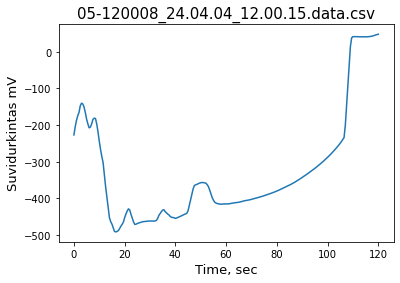

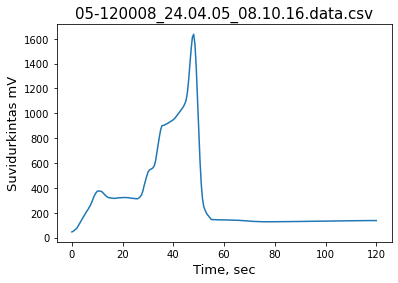

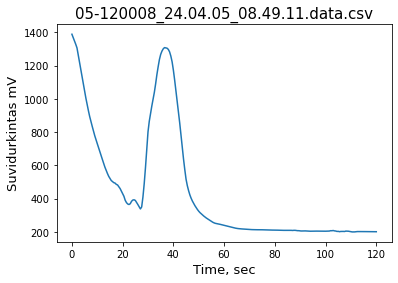

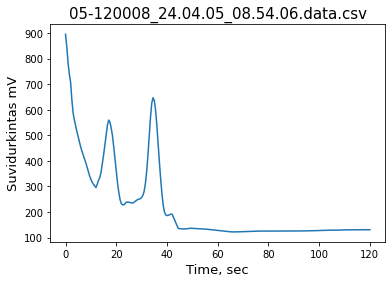

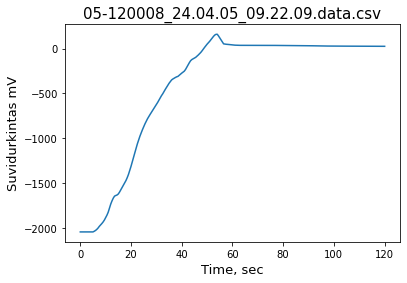

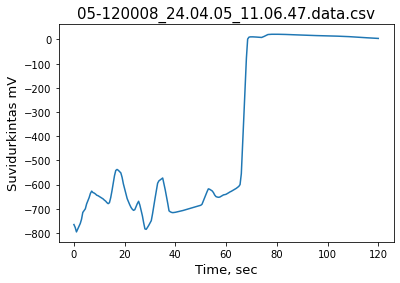

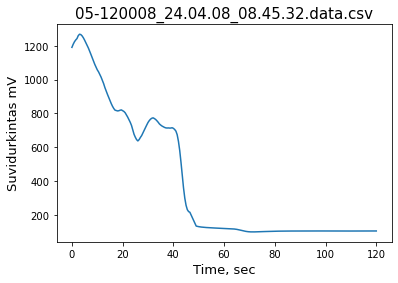

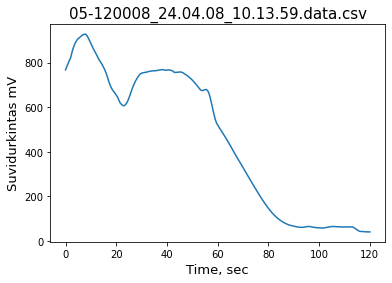

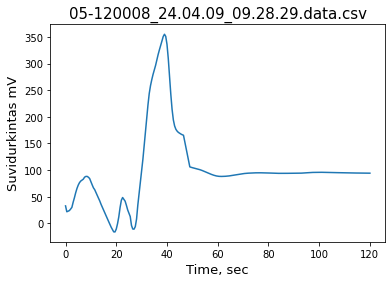

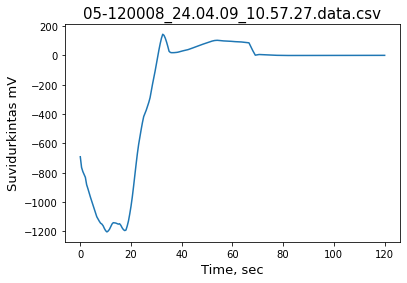

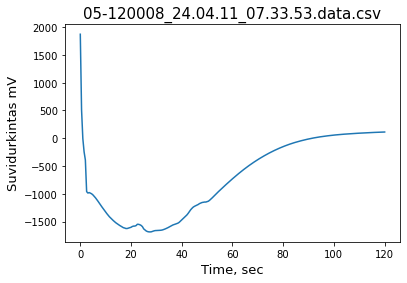

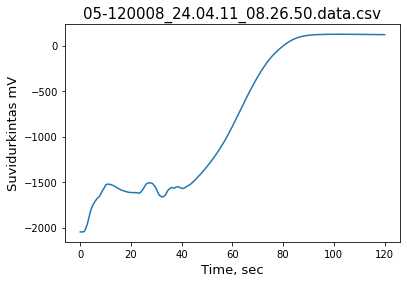

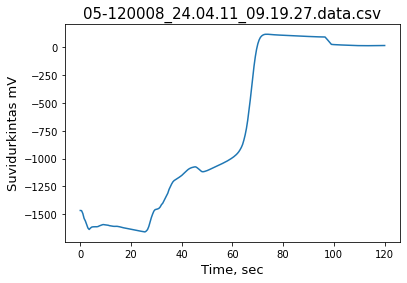

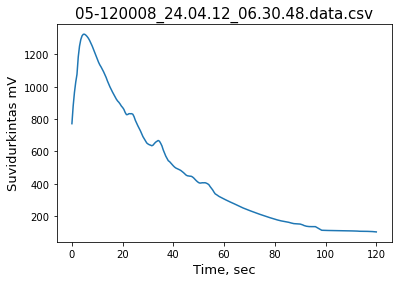

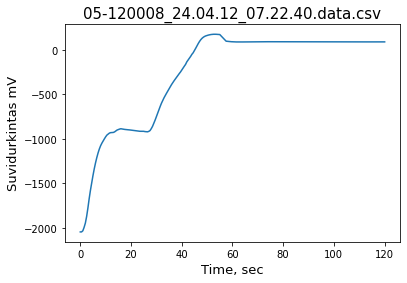

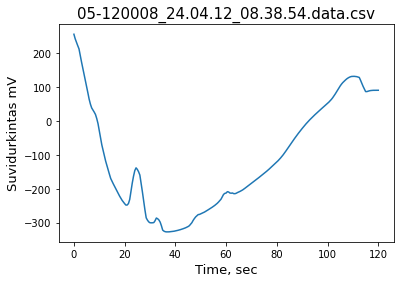

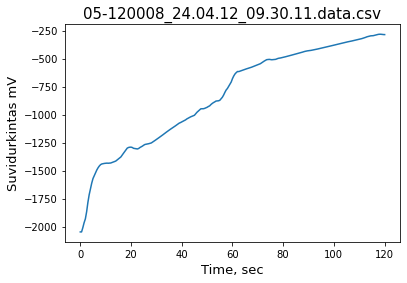

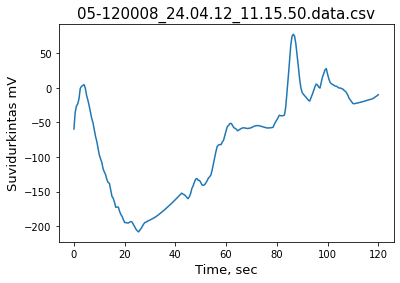

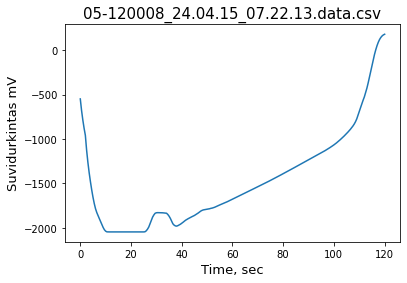

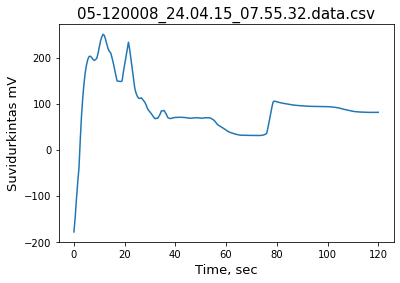

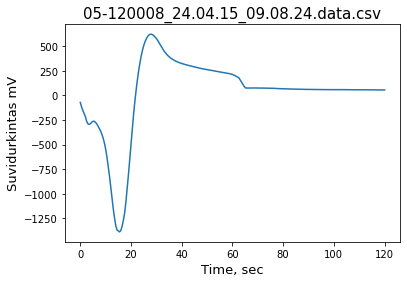

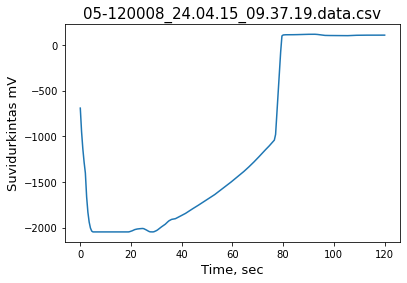

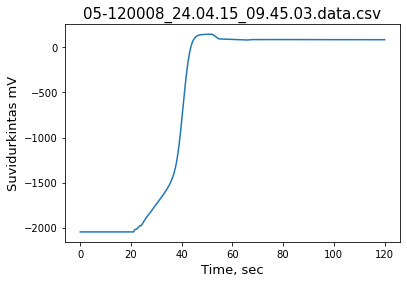

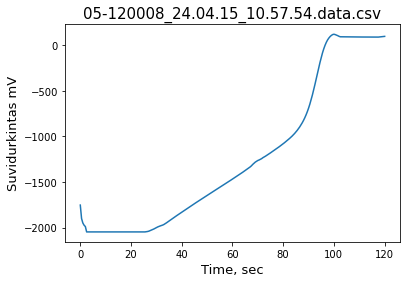

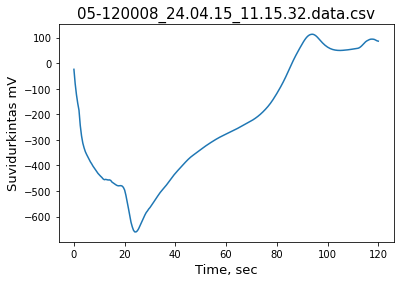

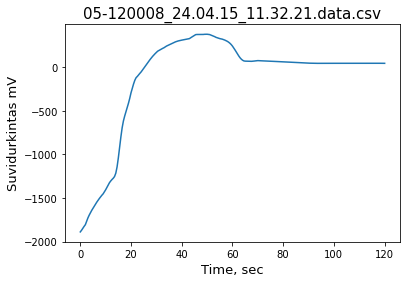

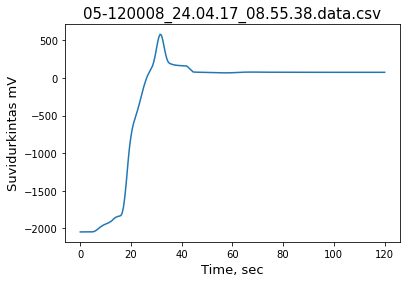

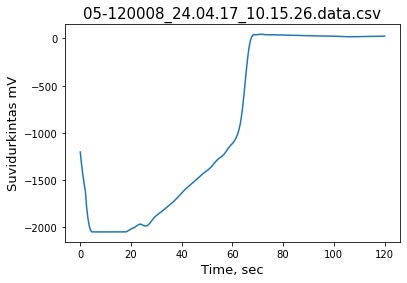

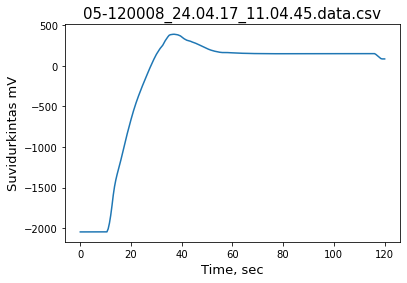

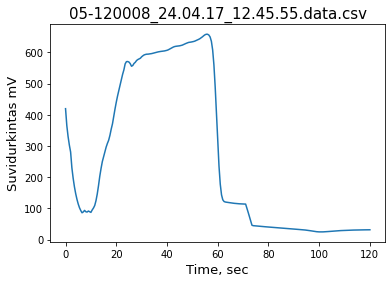

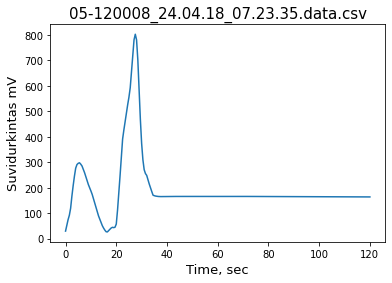

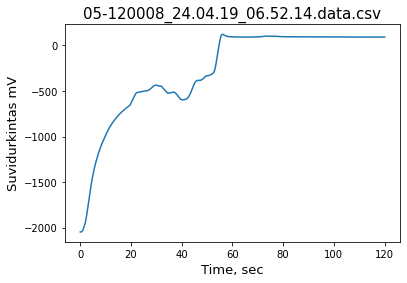

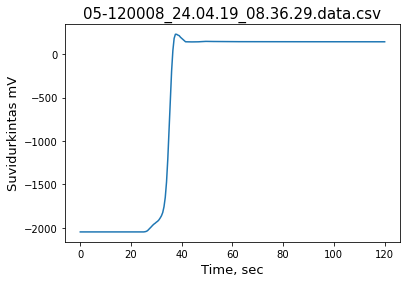

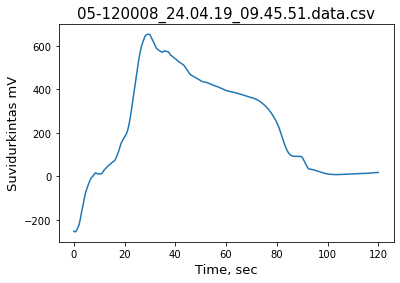

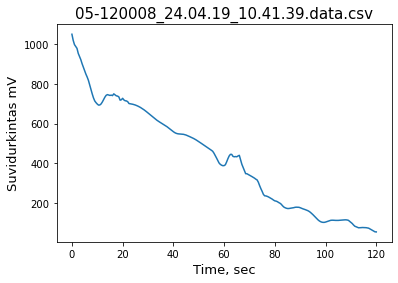

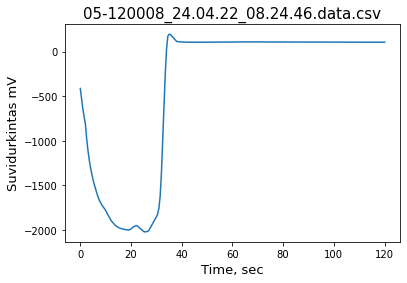

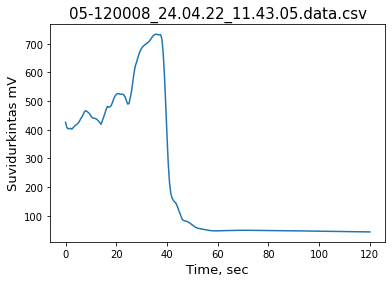

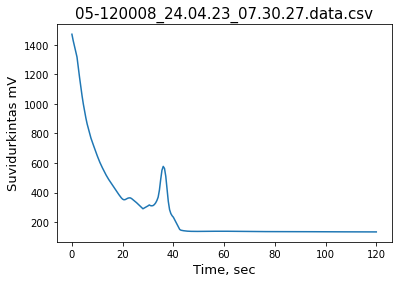

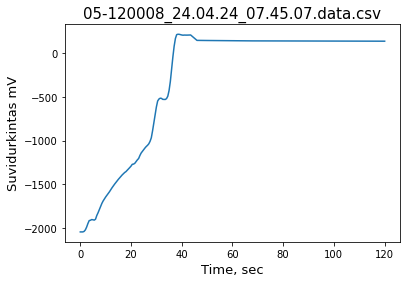

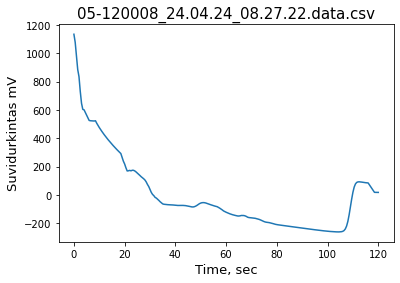

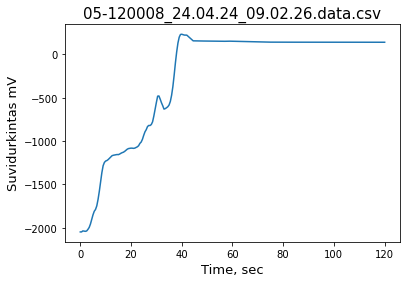

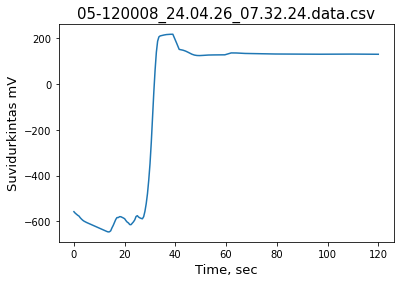

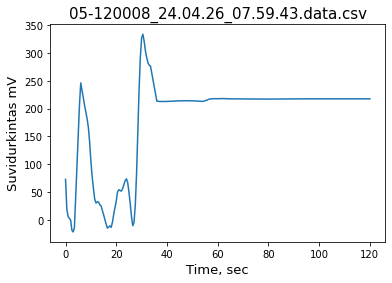

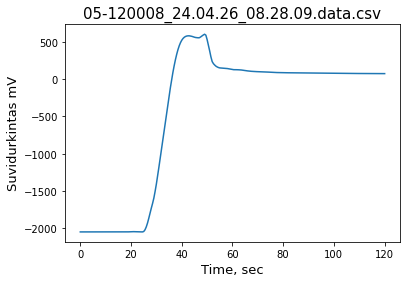

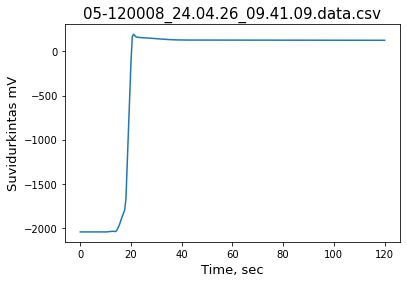

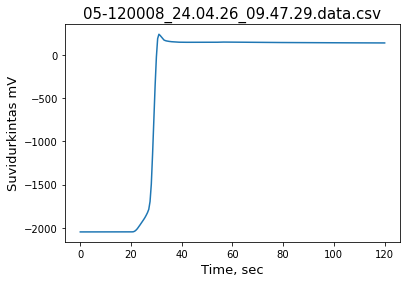

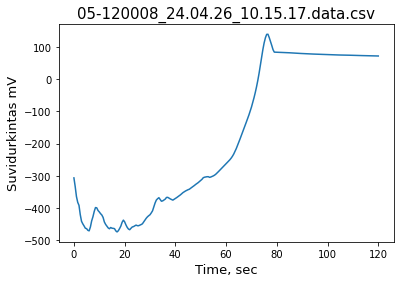

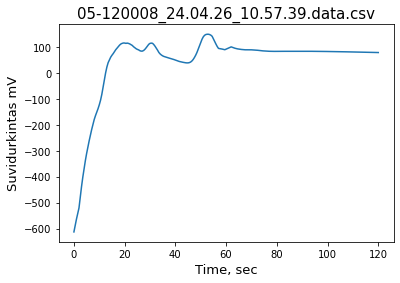

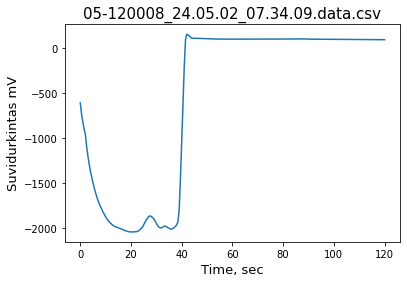

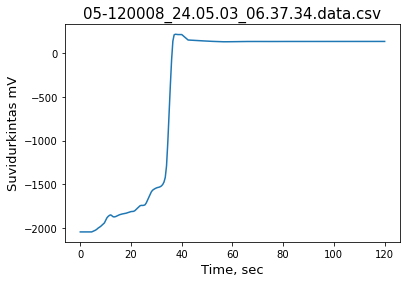

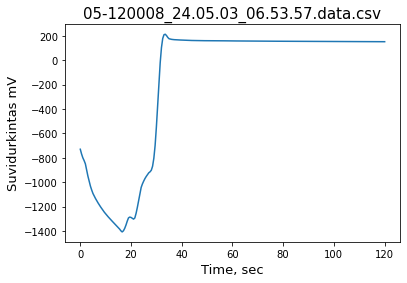

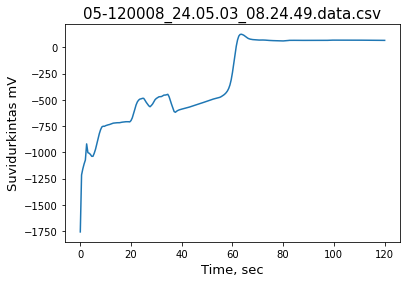

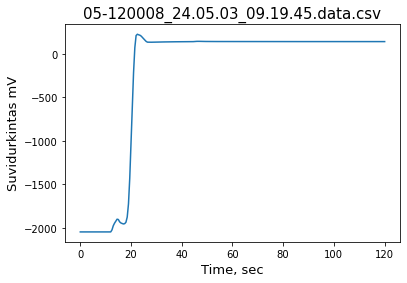

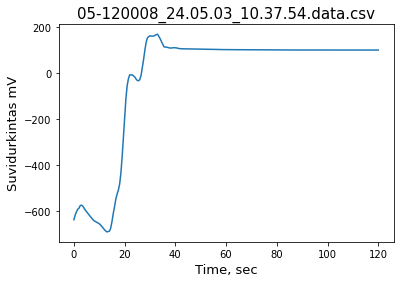

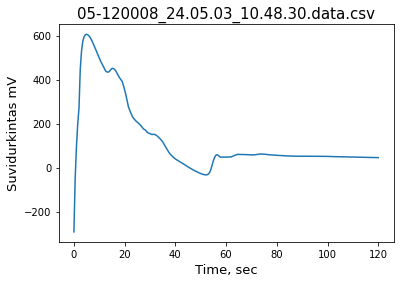

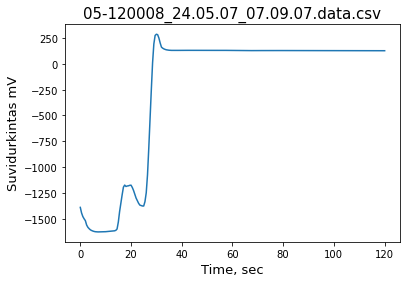

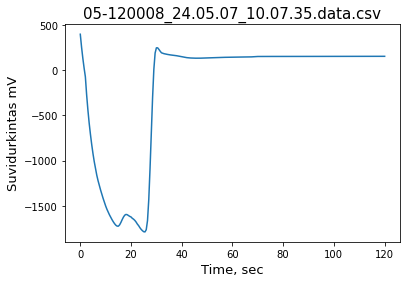

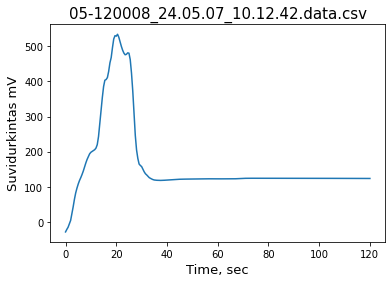

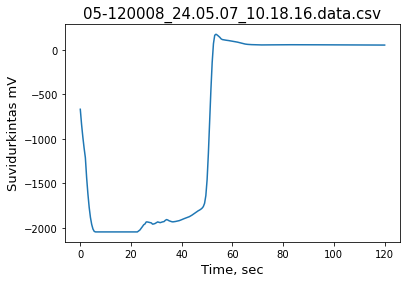

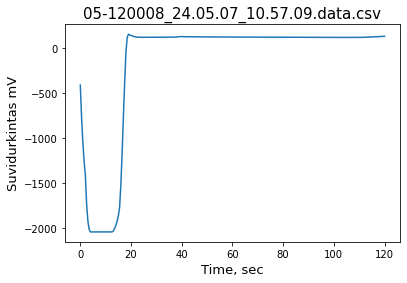

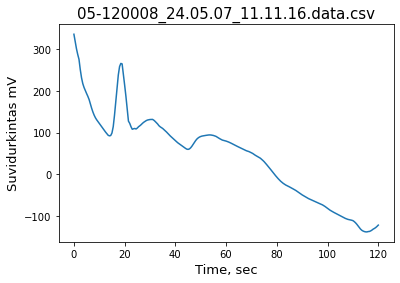

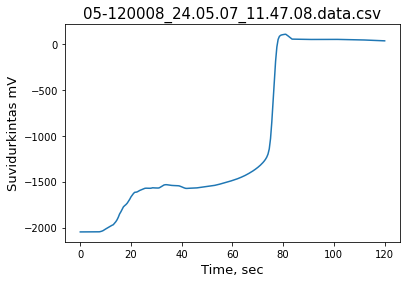

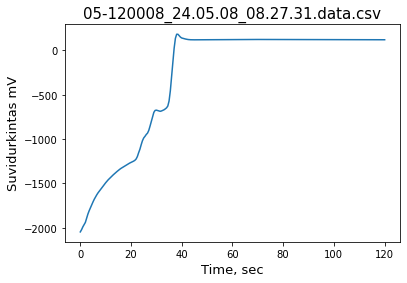

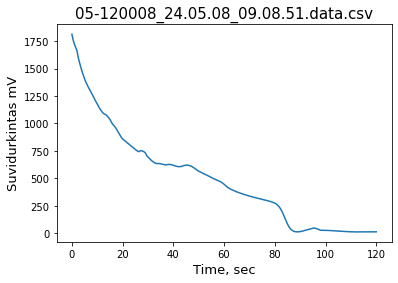

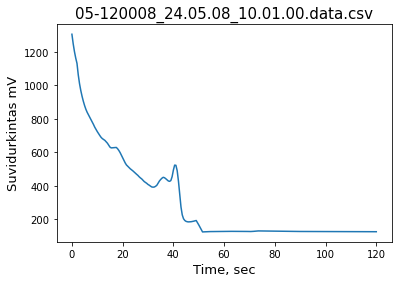

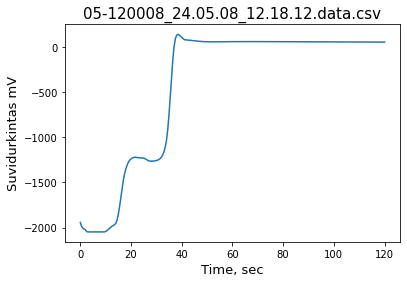

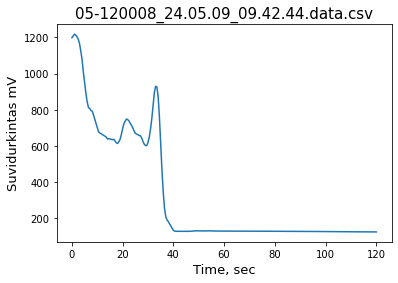

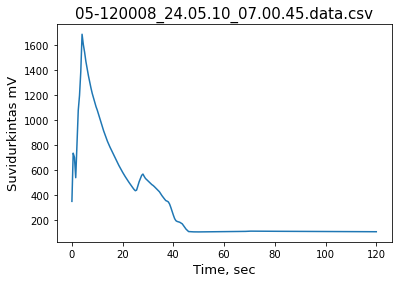

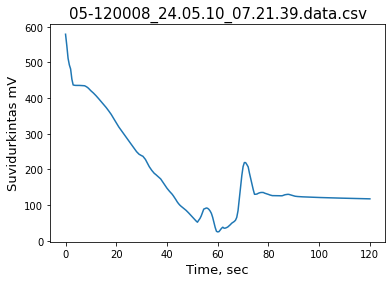

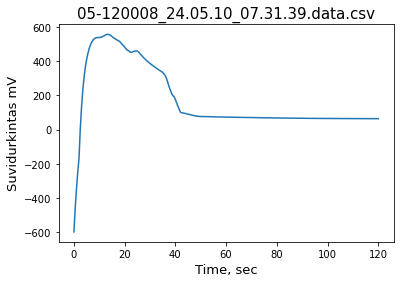

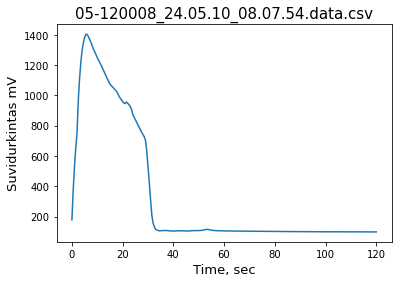

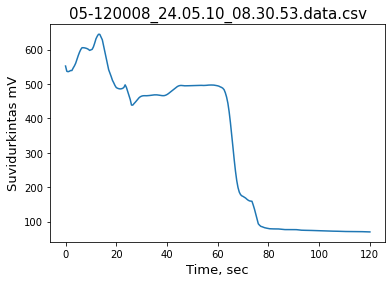

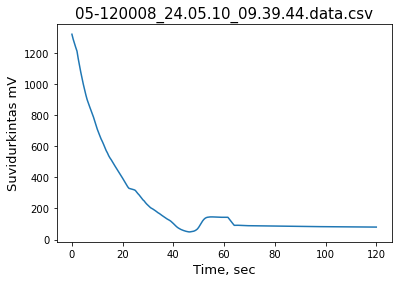

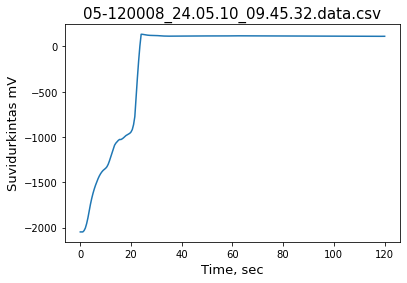

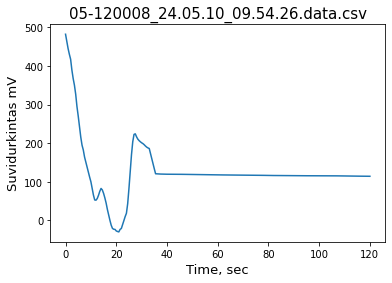

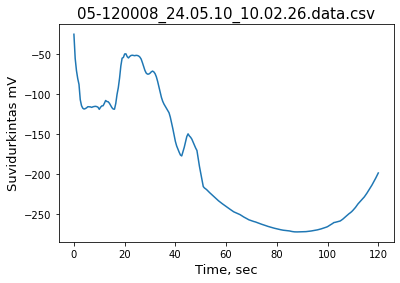

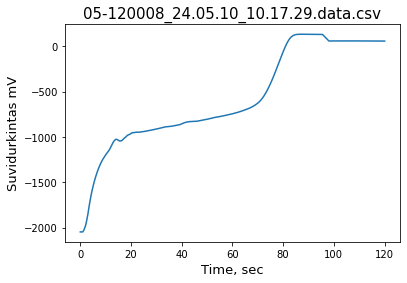

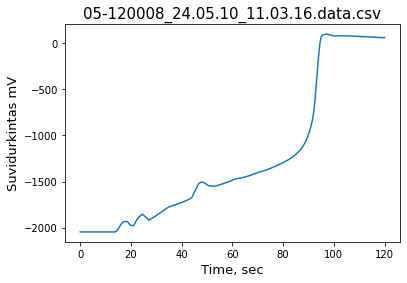

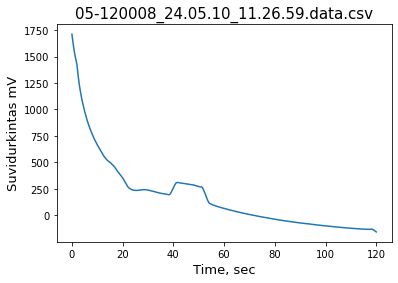

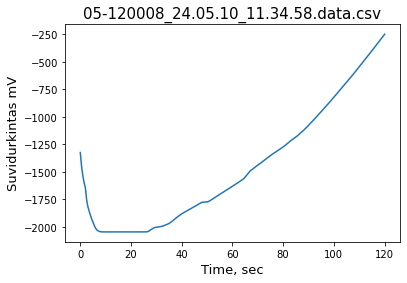

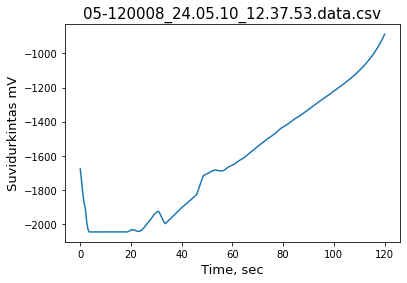

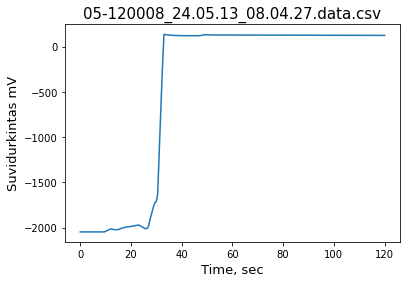

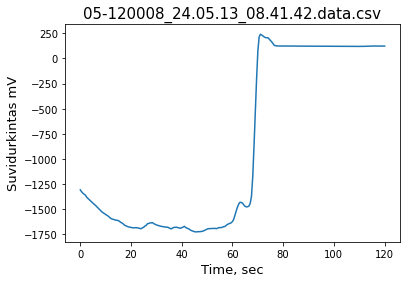

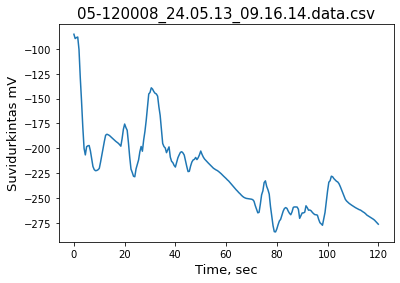

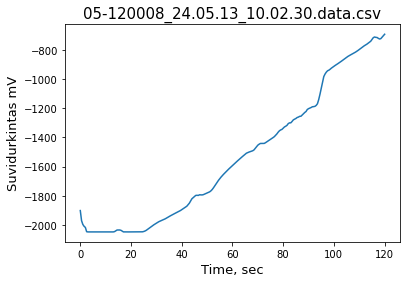

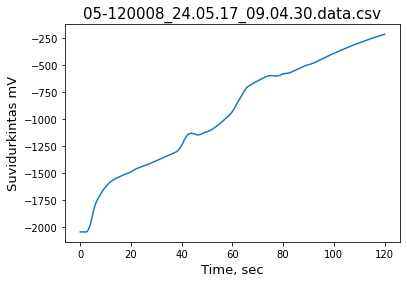

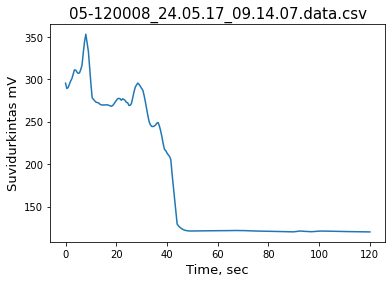

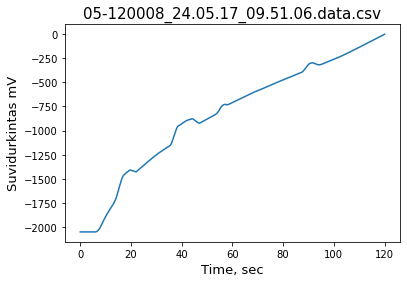

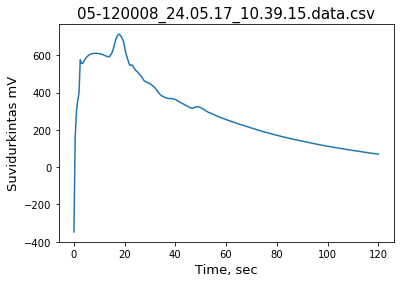

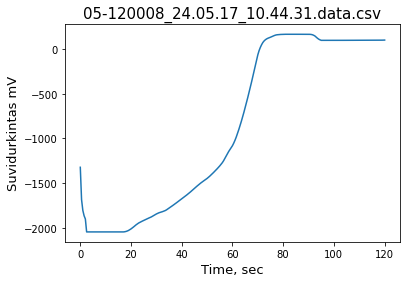

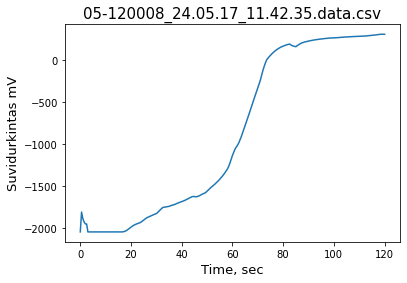

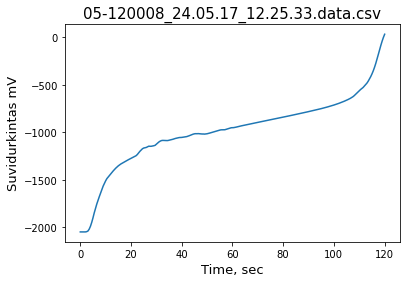

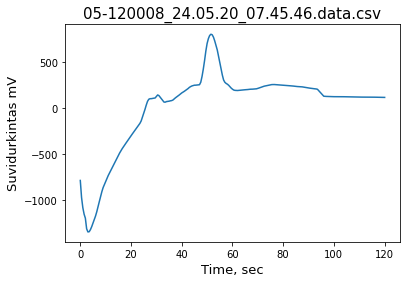

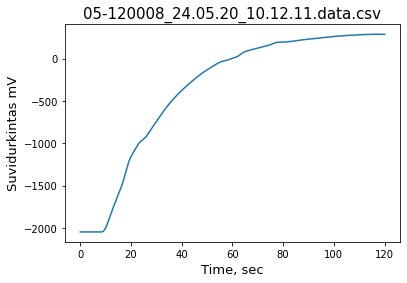

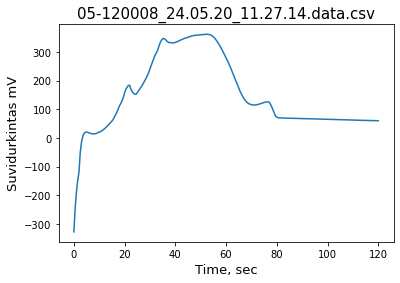

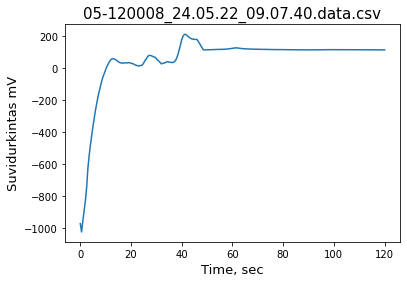

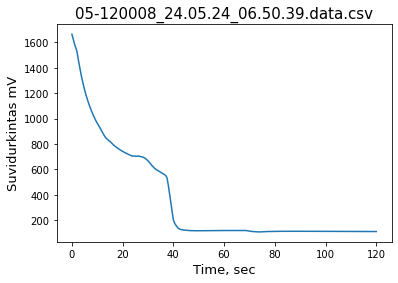

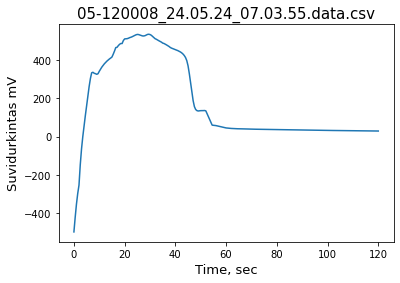

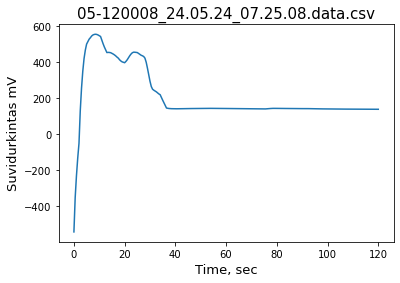

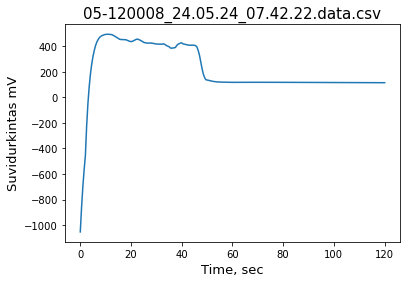

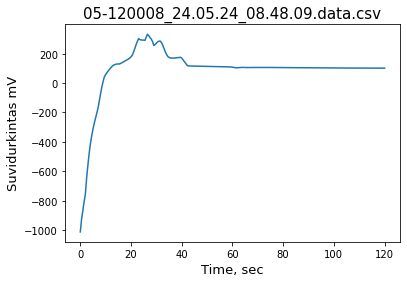

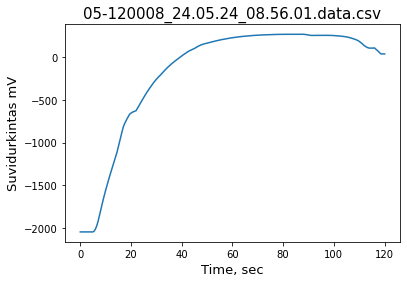

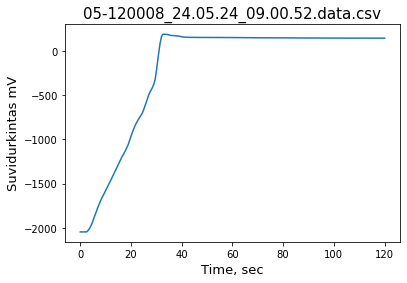

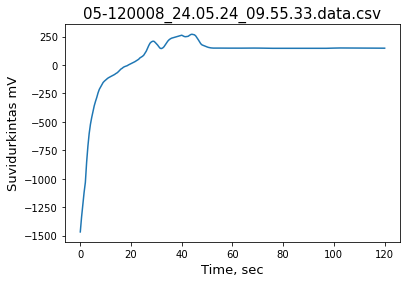

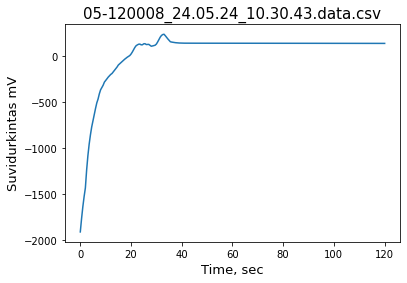

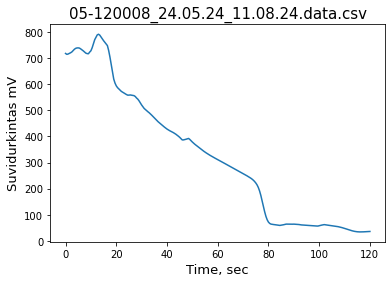

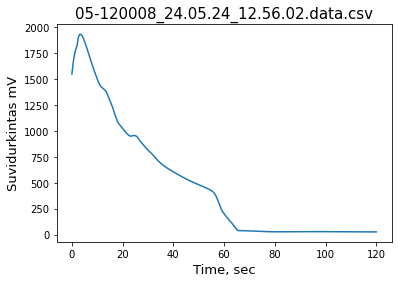

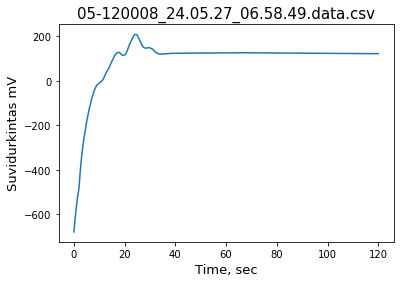

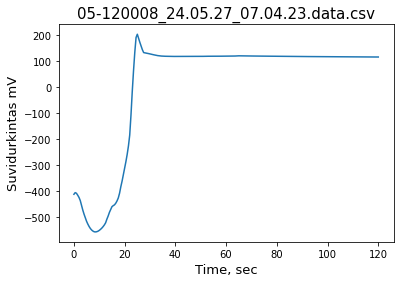

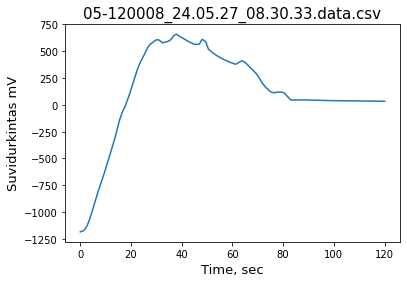

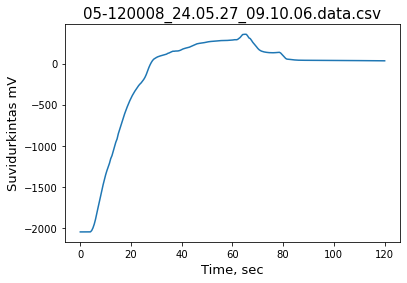

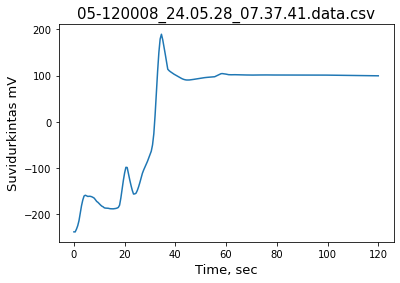

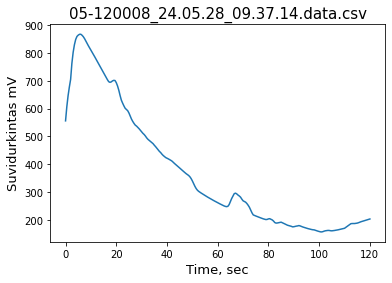

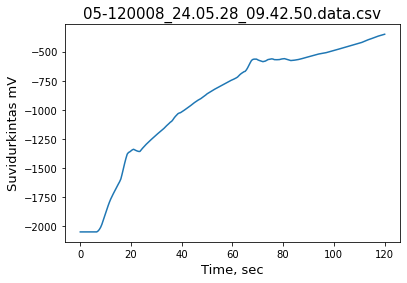

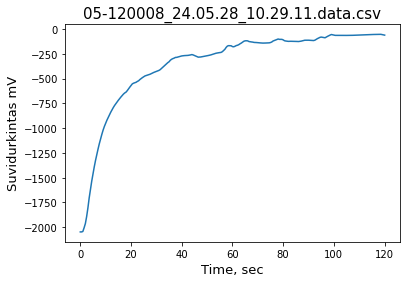

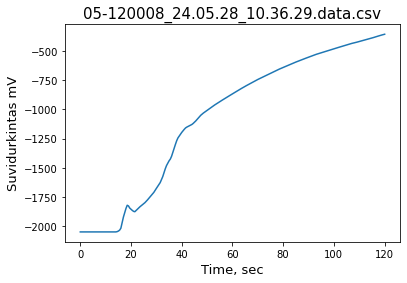

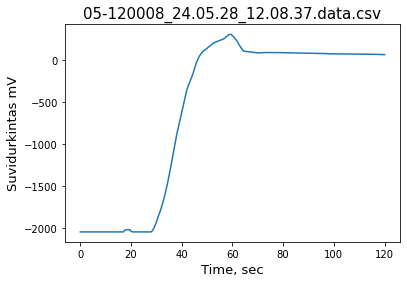

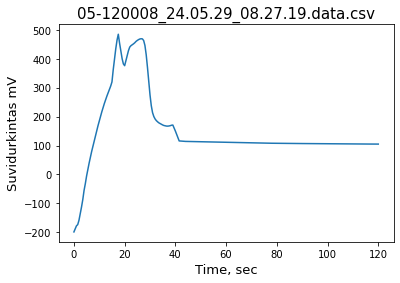

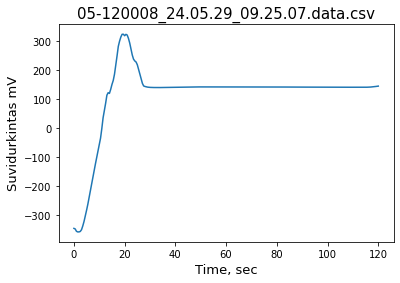

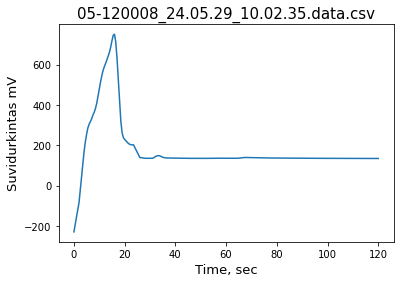

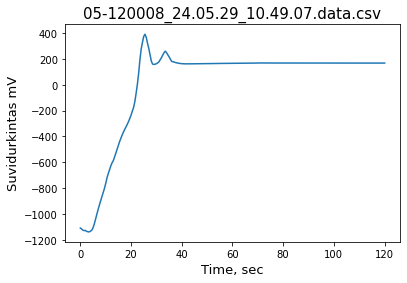

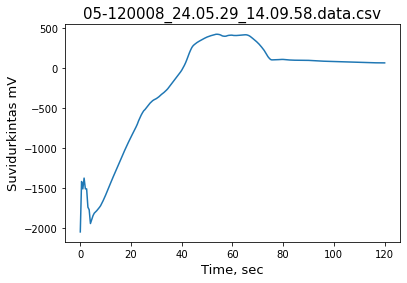

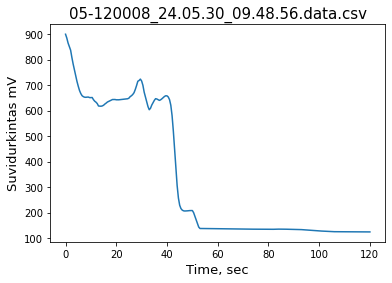

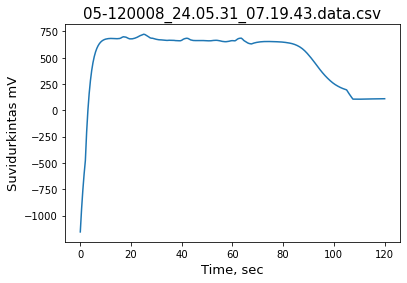

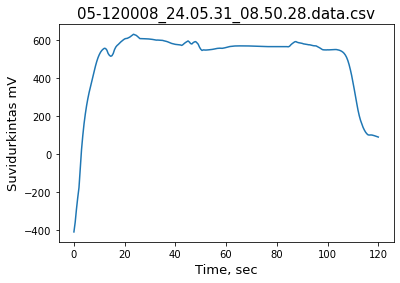

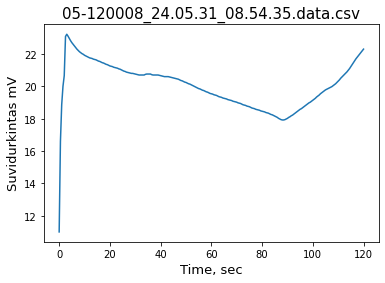

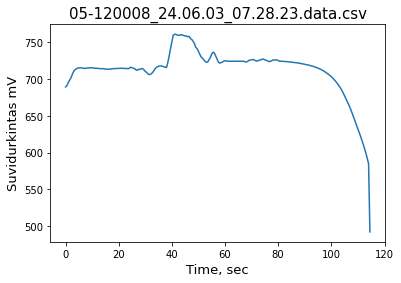

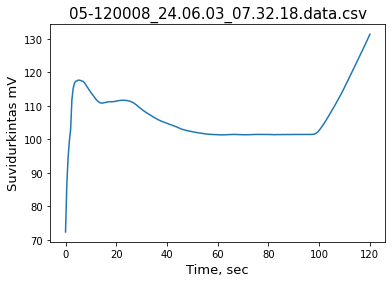

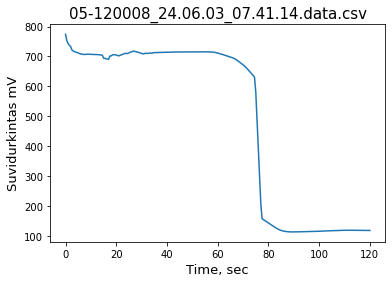

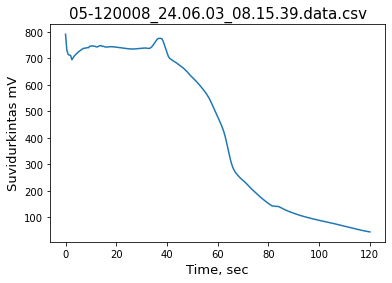

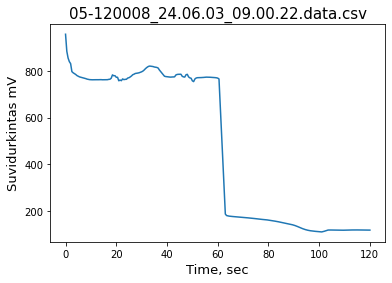

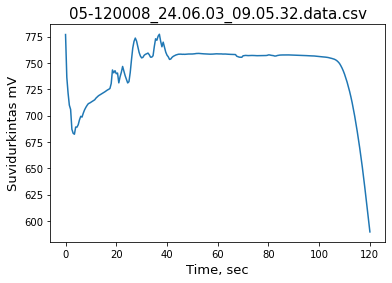

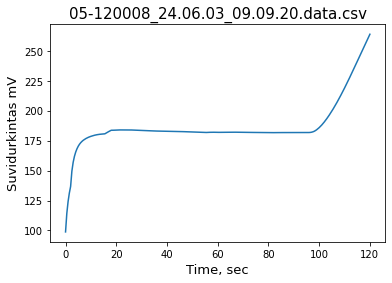

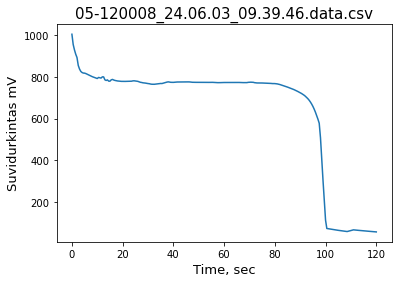

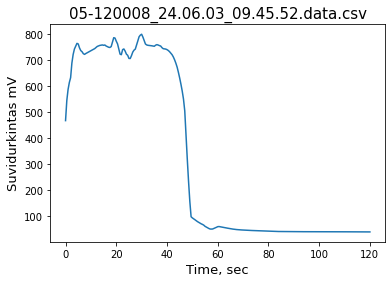

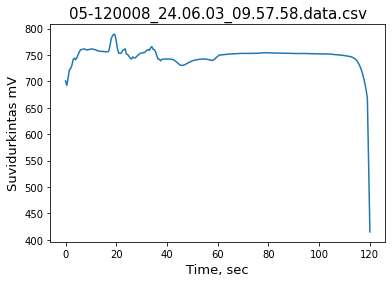

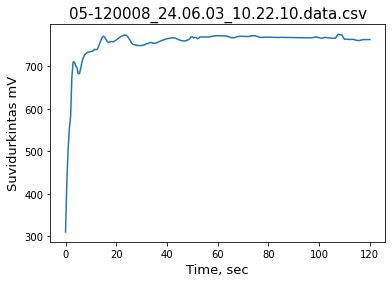

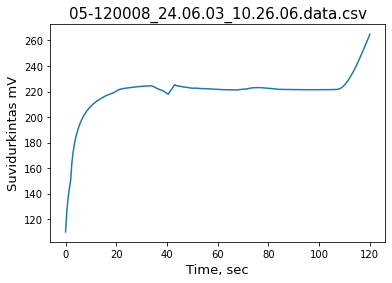

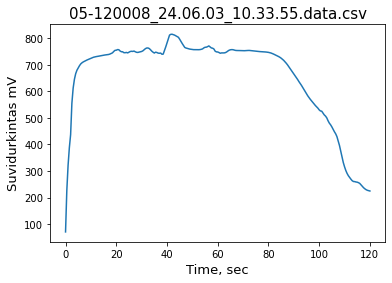

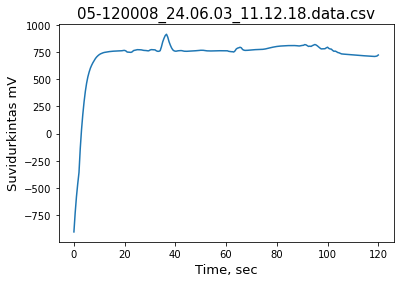

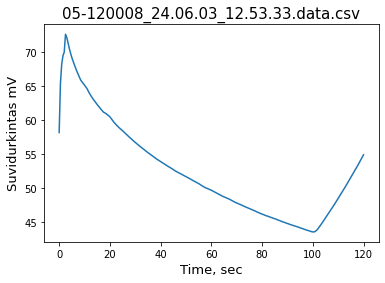

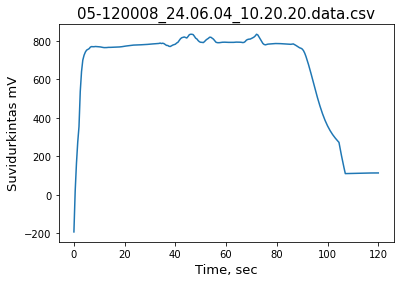

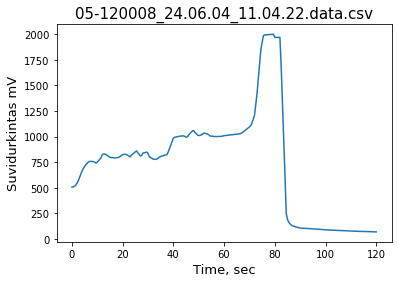

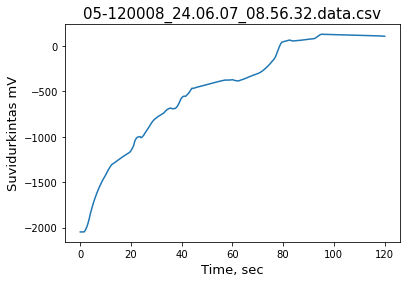

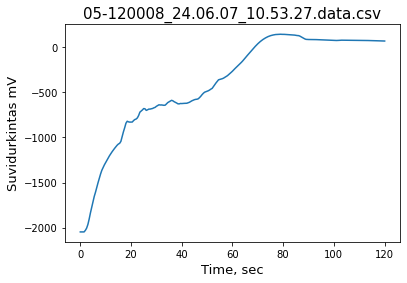

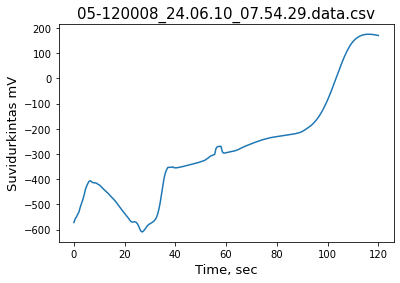

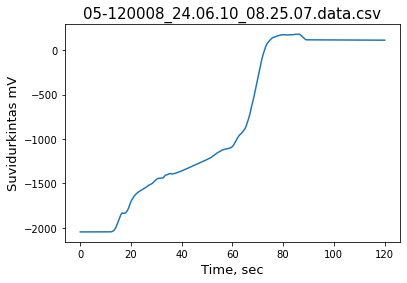

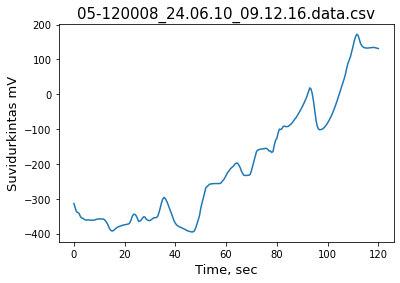

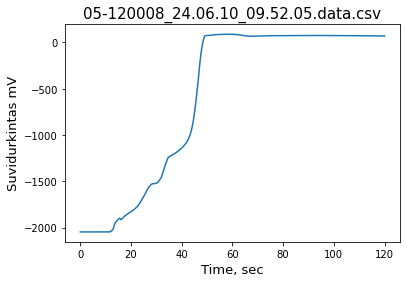

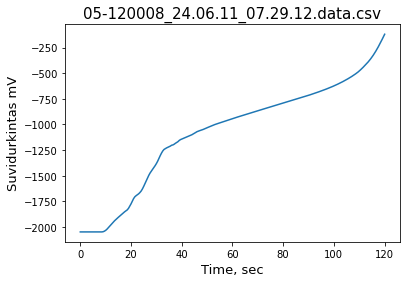

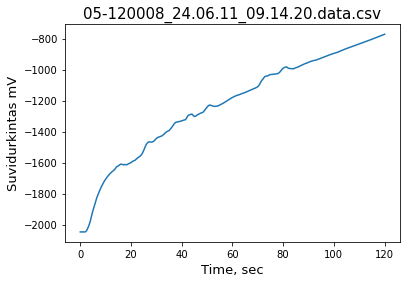

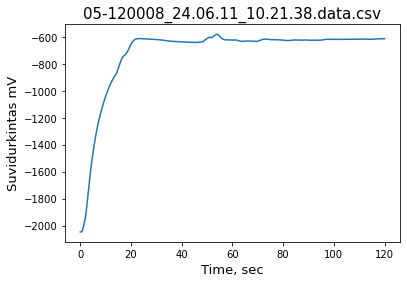

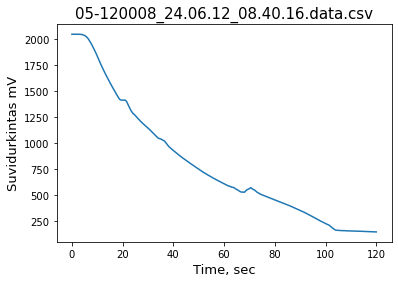

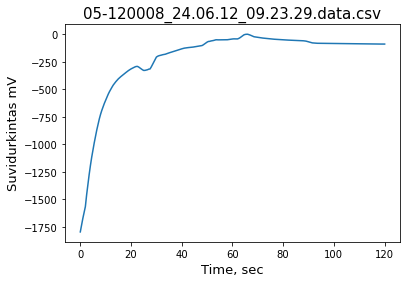

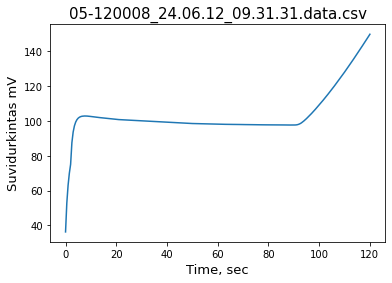

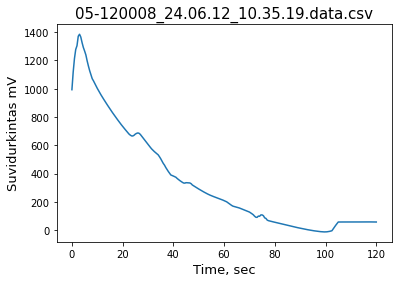

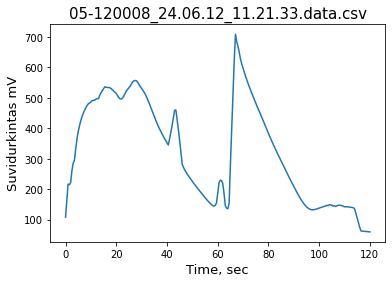

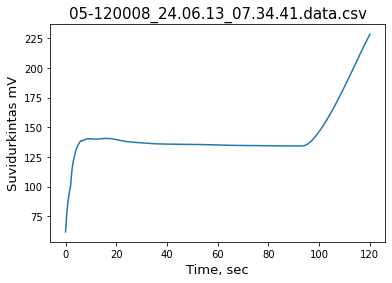

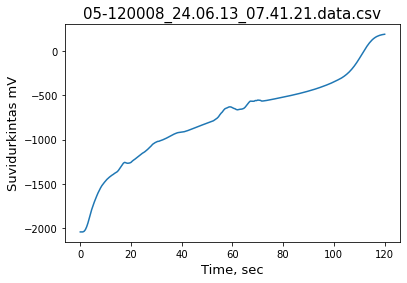

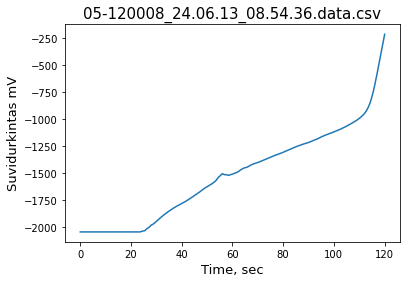

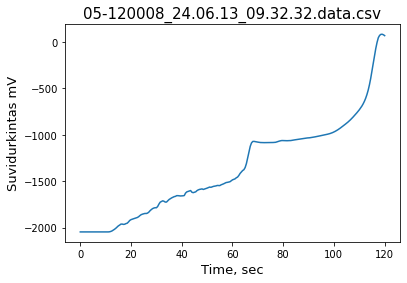

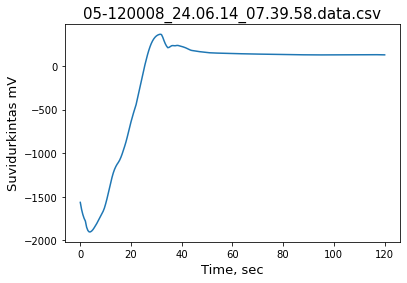

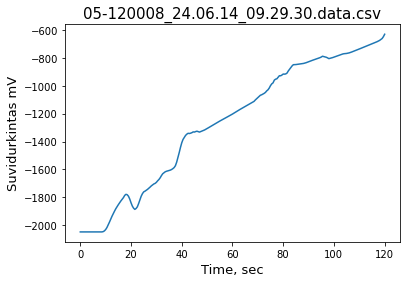

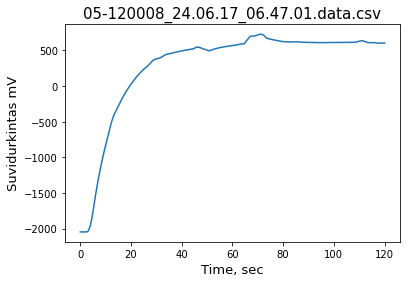

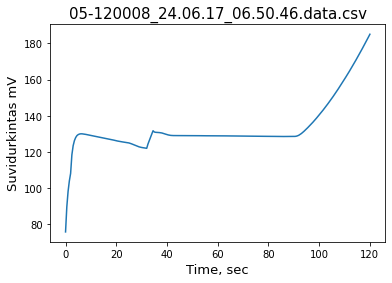

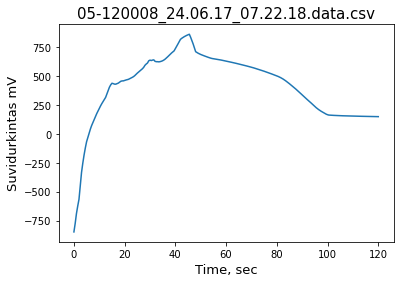

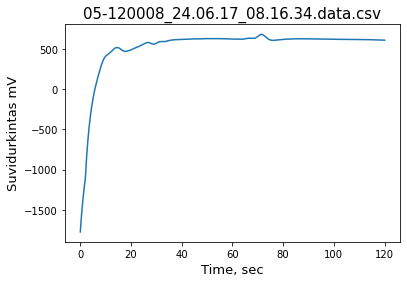

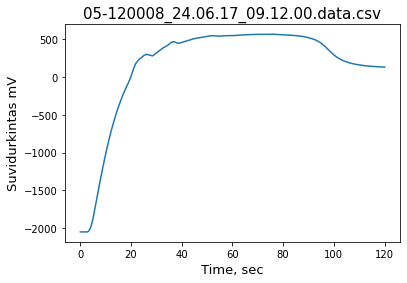

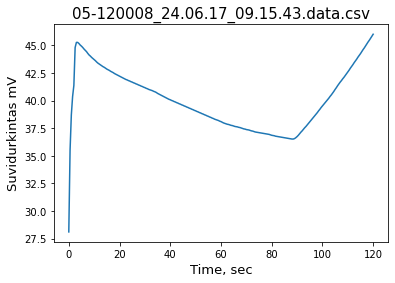

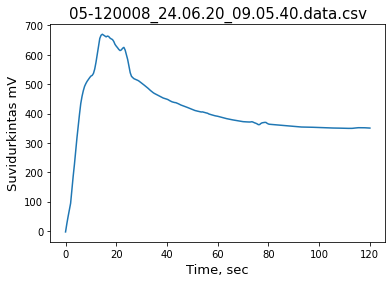

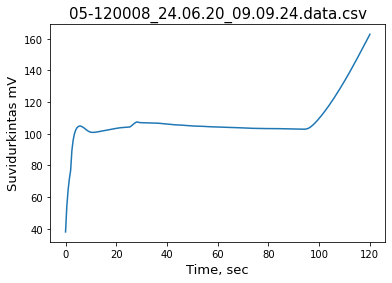

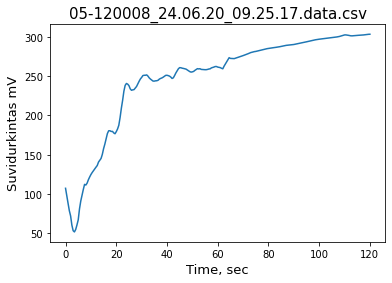

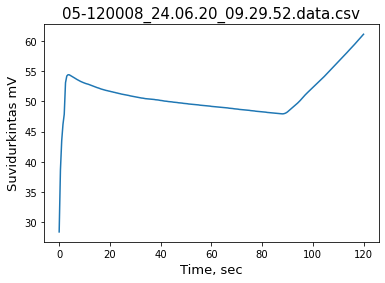

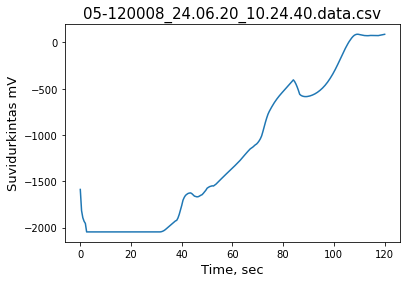

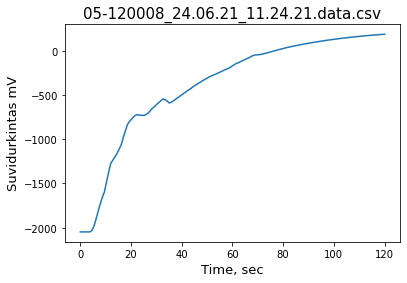

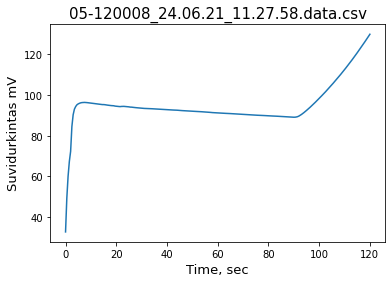

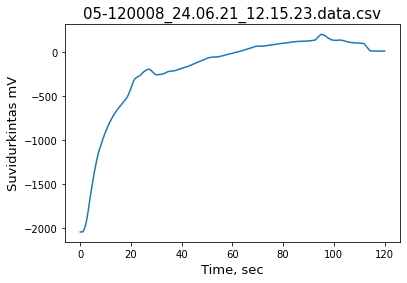

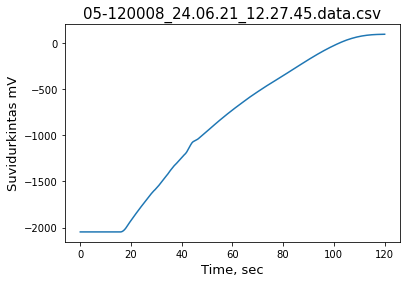

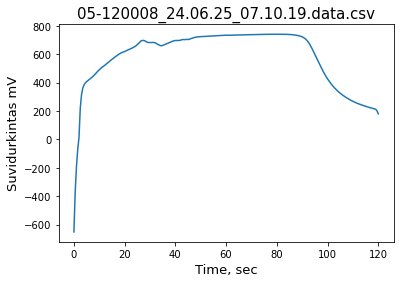

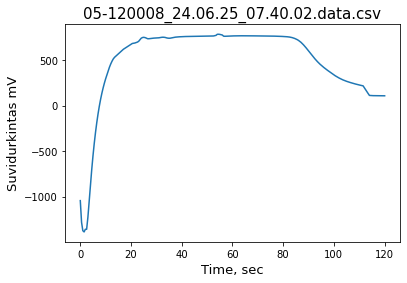

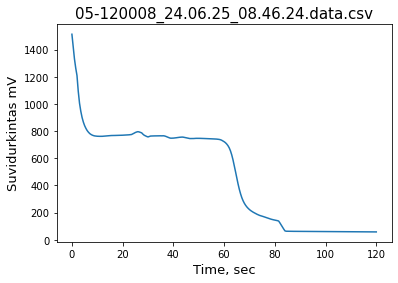

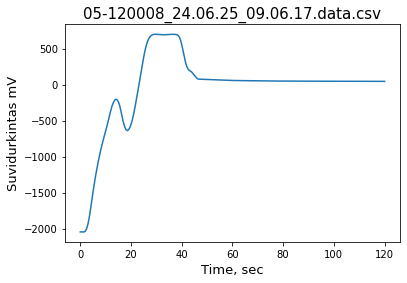

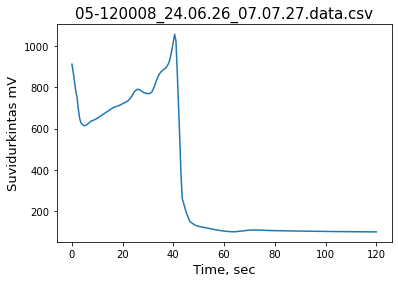

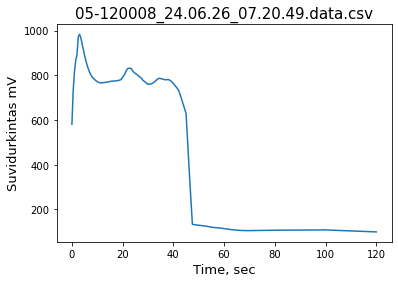

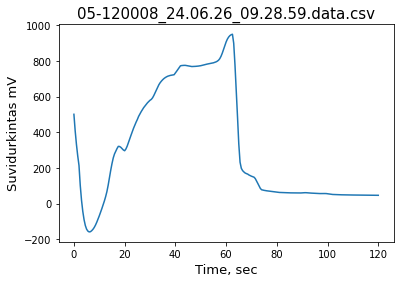

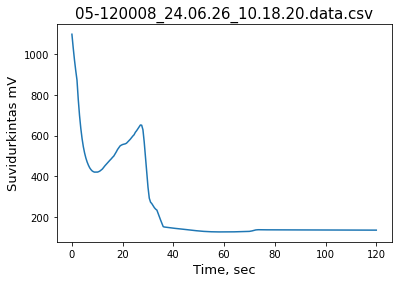

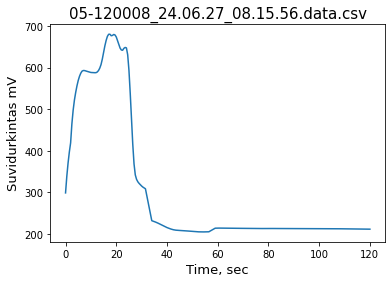

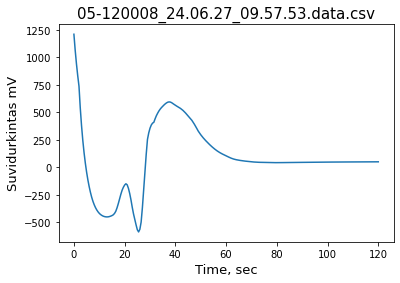

In [5]:
draw_all()